# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

In [1]:
include("TaylorDiff.jl")
using ATaylor

In [2]:
x=taylor([1,1],9)
x^2,x^3,x^4,x^5

(ATaylor.Taylor{Int64}([1,2,1],2),ATaylor.Taylor{Int64}([1,3,3,1],3),ATaylor.Taylor{Int64}([1,4,6,4,1],4),ATaylor.Taylor{Int64}([1,5,10,10,5,1],5))

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

**El método de Runge-Kutta**

Para el problema de valores iniciales
$$y'=f(x,y)$$
$$y(x_0)=y_0$$
La fórmula de Runge-Kutta involucra un promedio pesado de los valores de $f(x,y)$ tomado en puntos diferentes en el intervalo $x_n\leq x\leq x_{n+1}$. Está dada por
\begin{equation}
y_{n+1}=y_n+\frac{h}{6}\left[k_{n1}+2k_{n2}+2k_{n3}+k_{n4}\right]
\end{equation}
donde
$$\begin{array}{lll}
    k_{n1}& = &f(x_{n},y_{n})\\
    k_{n2}& = &f(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}hk_{n1})\\
    k_{n3}& = &f(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}hk_{n2})\\
    k_{n4}& = &f(x_{n}+h,y_{n}+hk_{n3})\\
  \end{array}$$
ver(Introducción a las Ecuaciones Diferenciales, E. Boyce y C. DiPrima).

Si $\dot{x}=f(t,x)=x^2$ con la condición inicial $x(t_0=0)=x_0 = 3$ entonces para $n=0$
$$\begin{array}{lll}
    k_{01}& = &f(t_{0},x_{0})=3^2\\
    k_{02}& = &f(t_{0}+\frac{1}{2}h,x_{0}+\frac{1}{2}hk_{01})=f(\frac{1}{2}h,3+\frac{1}{2}h3^2)
    =\left[3+\frac{1}{2}h3^2\right]^2\\
    k_{03}& = &f(t_{0}+\frac{1}{2}h,x_{0}+\frac{1}{2}hk_{02})=\left[3+\frac{1}{2}h\left(3+\frac{1}{2}h3^2\right)^2\right]^2\\
    k_{04}& = &f(t_{0}+h,x_{0}+hk_{03})=\left\{3+h\left[3+\frac{1}{2}h\left(3+\frac{1}{2}h3^2\right)^2\right]^2\right\}^2\\
  \end{array}$$
  
  \begin{equation}
x_{1}=x_0+\frac{h}{6}\left[k_{01}+2k_{02}+2k_{03}+k_{04}\right]
\end{equation}

In [3]:
using PyPlot

In [4]:
"""
    metRungeKutta(f,x0,y0,N,h)

Esta función resuelve la ecuación diferencial \$y'=f(x,y)\$ con condición inicial \$y(x_0)=y_0\$. Los valores de 
entrada son \$f=f(x,y)\$, \$x0,y0\$(condiciones iniciales), \$N\$(número de iteraciones), \$h\$(tamaño del intervalo 
\$[x_n,x_{n+1}]\$).
"""
function metRungeKutta(f,x0,y0,N,h)
    y=zeros(eltype(h),N)
    x=zeros(eltype(h),N)
    x[1]=x0 
    y[1]=y0
    for i in 1:N-1
        kn1=f(x[i],y[i])
        kn2=f(x[i]+(1/2)*h,y[i]+(1/2)*h*kn1)
        kn3=f(x[i]+(1/2)*h,y[i]+(1/2)*h*kn2)
        kn4=f(x[i]+h,y[i]+h*kn3)
        y[i+1]=y[i]+(h/6)*(kn1 +2kn2+2kn3+kn4)
        x[i+1]=i*h
    end
    return x,y
end
"""
    funcion(g,N,h)

Esta función regresa los vectores \$x\$ y \$y=g(x)\$ para \$N\$ puntos separados una distancia \$h\$.
"""
function funcion(g,N,h)
    x=zeros(eltype(h),N)
    y=zeros(eltype(h),N)
    for i in 1:N
        x[i]=(i-1)*h
        y[i]=g(x[i])
    end
    return x,y
end

funcion

In [5]:
?metRungeKutta

search:



```
metRungeKutta(f,x0,y0,N,h)
```

Esta función resuelve la ecuación diferencial $y'=f(x,y)$ con condición inicial $y(x_0)=y_0$. Los valores de  entrada son $f=f(x,y)$, $x0,y0$(condiciones iniciales), $N$(número de iteraciones), $h$(tamaño del intervalo  $[x_n,x_{n+1}]$).


In [6]:
f(t,x)=x^2  #ecuación diferencial
g(t)=3/(1-3t) #solución analítica a la ecuación diferencial
h=0.001  
N=330
x0=0.0 #valor de t_0=0.0
y0=3.0 #valor de x0=3.0
(t,x)=metRungeKutta(f,x0,y0,N,h)
(a,b)=funcion(g,N,h)

([0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  0.32,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329],[3.0,3.00903,3.01811,3.02725,3.03644,3.04569,3.05499,3.06435,3.07377,3.08325  …  75.0,81.0811,88.2353,96.7742,107.143,120.0,136.364,157.895,187.5,230.769])

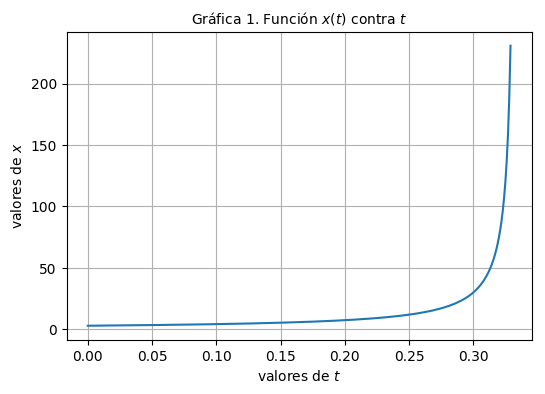

In [7]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,x)    # este comando pinta la función f'(x); 
title(L"Gráfica 1. Función $x(t)$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
grid() 

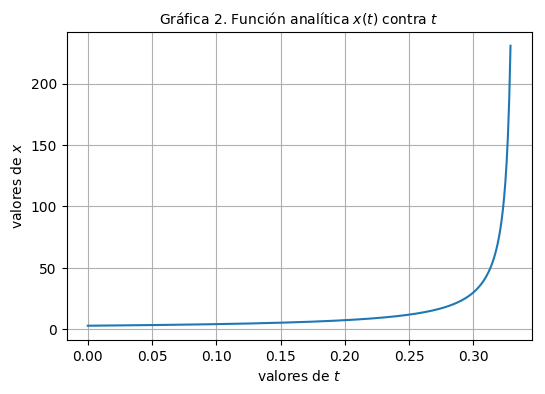

In [8]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(a,b)    # este comando pinta la función f'(x); 
title(L"Gráfica 2. Función analítica $x(t)$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
grid()

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.